In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pimadata/pima-indians-diabetes.csv


In [10]:
data=pd.read_csv('/kaggle/input/pimadata/pima-indians-diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [12]:
data.shape

(768, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#drop duplicates
data = data.drop_duplicates()

In [73]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [74]:
data.nunique()

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
DPF              517
Age               52
Outcome            2
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

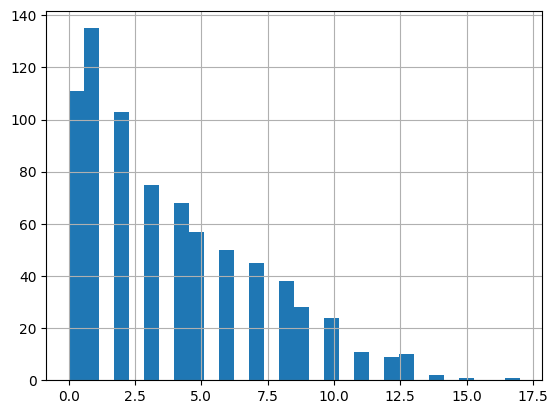

In [17]:
# Univariate 
# For numerical columns
data['Pregnancies'].hist(bins=30)
plt.show()

# For categorical columns
#data['categorical_column'].value_counts().plot(kind='bar')
#plt.show()

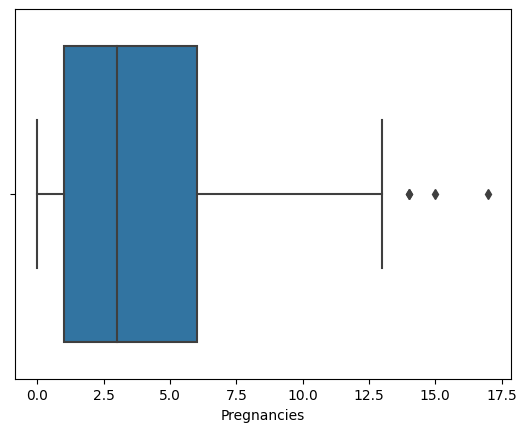

In [18]:
# Box plot for 'Pregnancies'
sns.boxplot(data=data, x='Pregnancies')
plt.show()

In [78]:
# Value counts for 'Pregnancies'
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [79]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

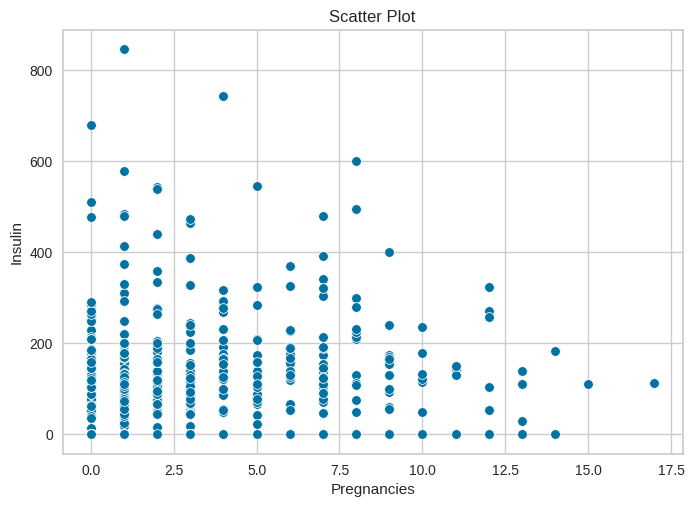

In [80]:
#bivariate analysis
# Scatter plot between two numerical variables
sns.scatterplot(x='Pregnancies', y='Insulin', data=data)
plt.title('Scatter Plot')
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.show()


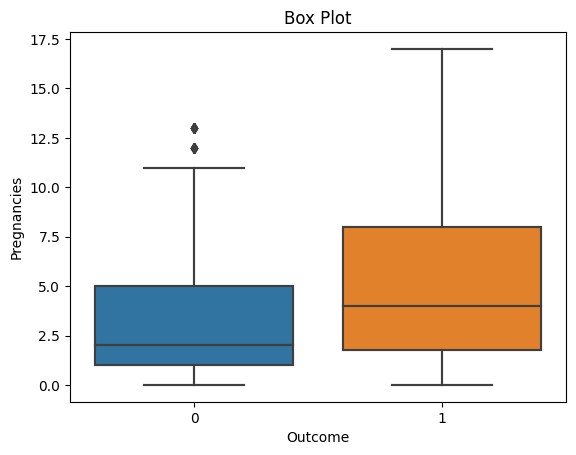

In [20]:
sns.boxplot(x='Outcome', y='Pregnancies', data=data)
plt.title('Box Plot')
sns.boxplot(x='Outcome', y='Pregnancies', data=data)
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.show()

There is strong correlation between Glucose and outcome (0.47), insulin and skinthickness (0.44), BMI and skinthickness (0.39).


In [24]:
# Correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

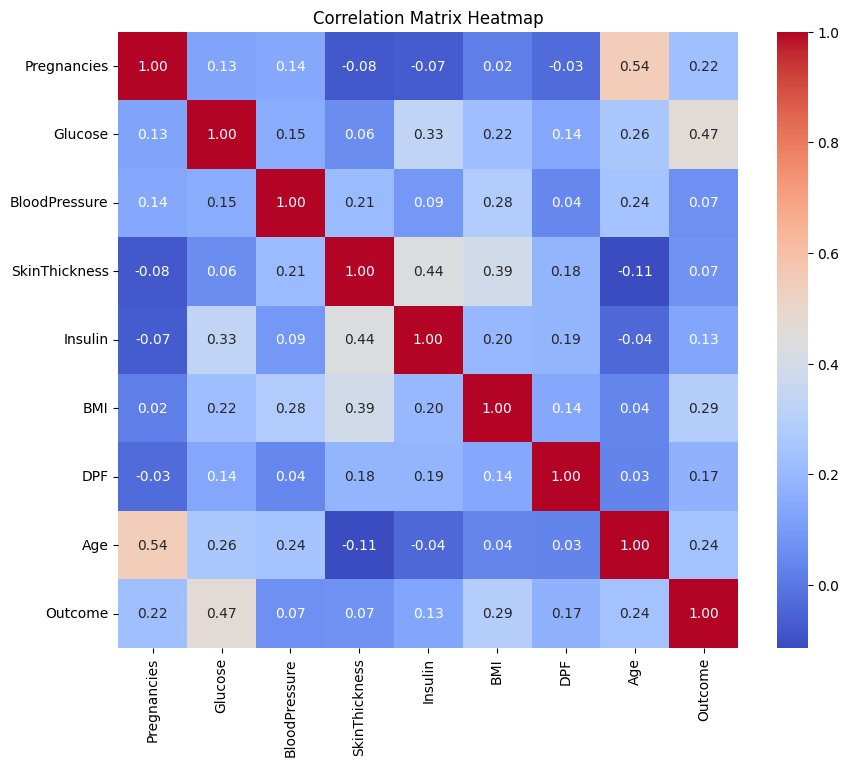

In [25]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

There is strong correlation between Glucose and outcome (0.47), insulin and skinthickness (0.44), BMI and skinthickness (0.39).

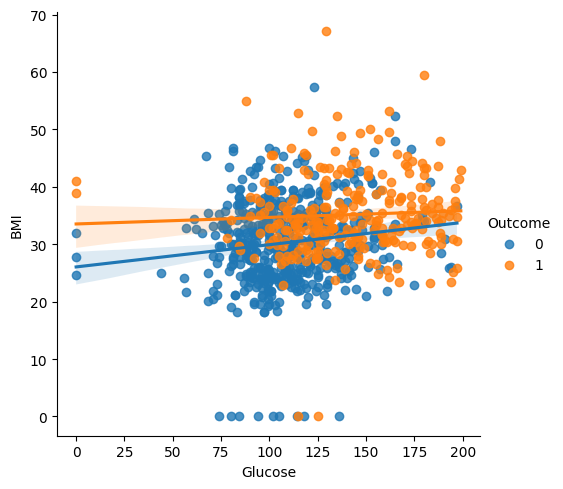

In [26]:
#linear regression

sns.lmplot(y="BMI", x="Glucose", hue = 'Outcome',data=data, palette='tab10')

In [ ]:
# imputer to replace zeros in dataset
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median") # replacing with median because the columns have extreme values
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
imputer = rep_0.fit(data[cols])
data[cols] = imputer.transform(data[cols])

In [ ]:
# data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

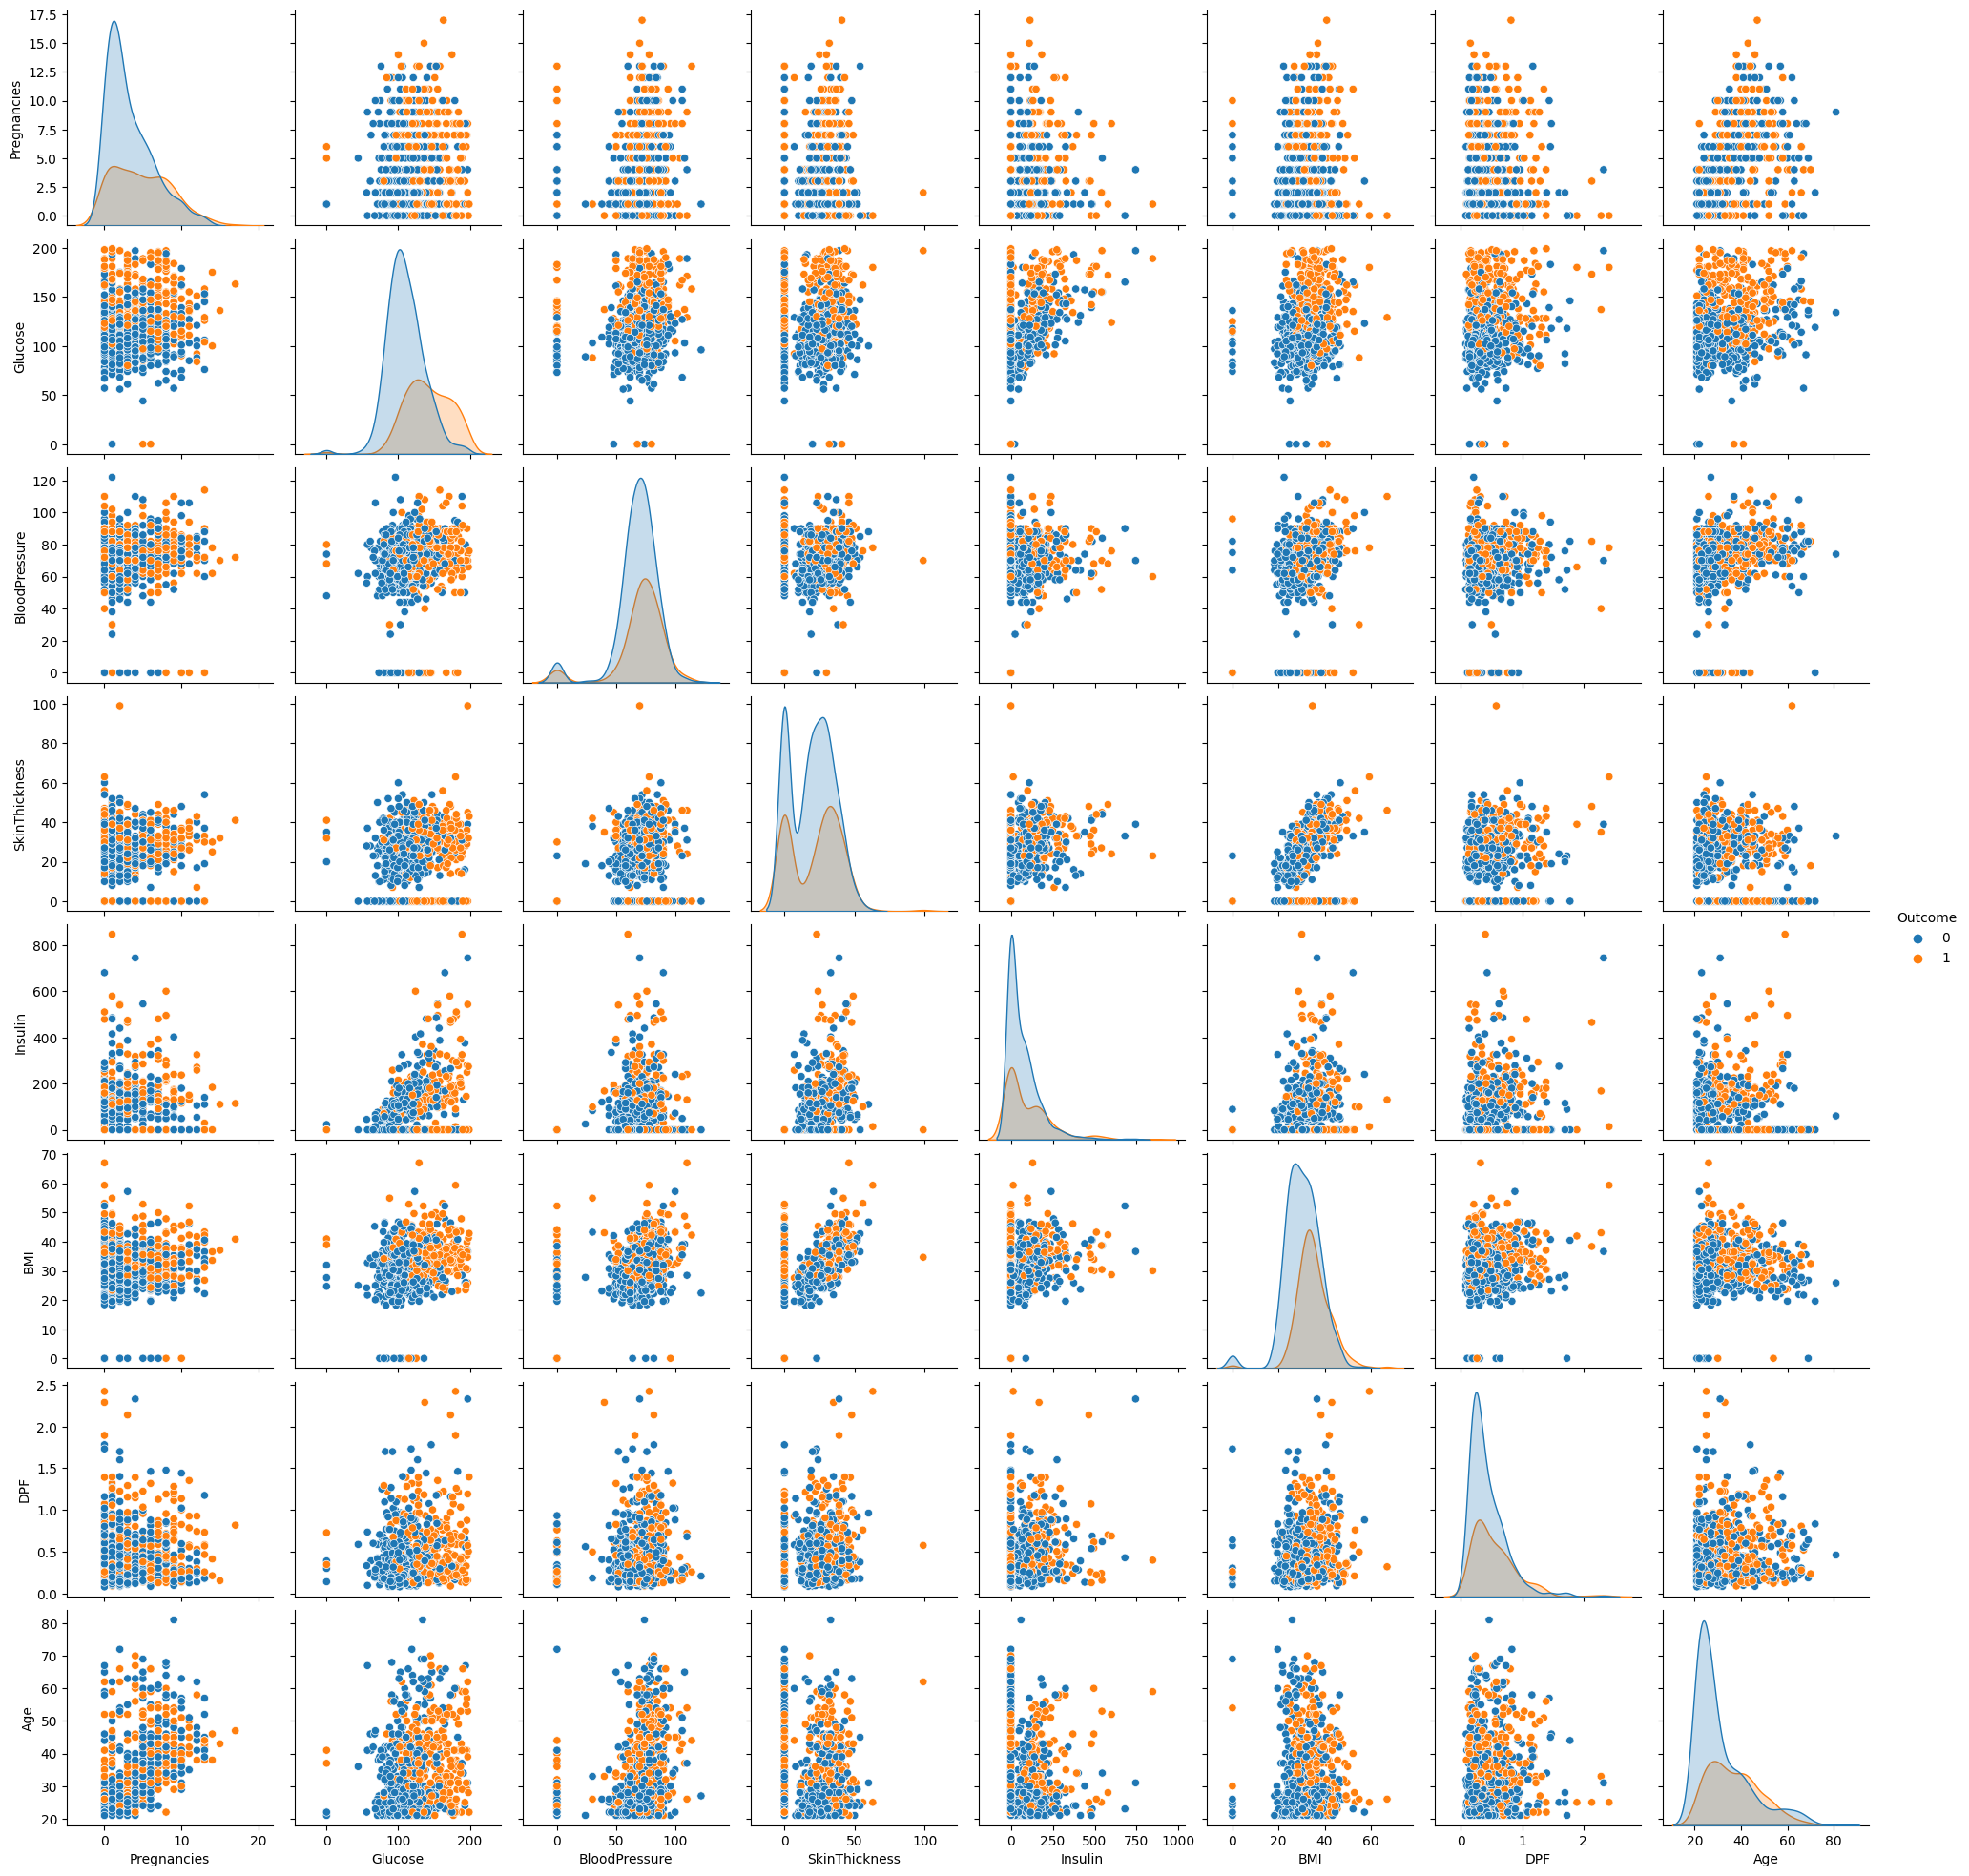

In [27]:
import seaborn as sns
import pandas as pd

# Check if 'Outcome' exists in the dataset
print(data.columns)



# Now create the pairplot
sns.pairplot(data, hue='Outcome', diag_kind='kde')


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data.drop(['Outcome'], axis=1) # Predictor feature columns (7 X m)
Y = data['Outcome'] #Predicted class (1=True, 0=False) (1 X m)

In [34]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [35]:
# Check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [36]:

print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



Model Building

Following models will been evaluated:

Logistic regression
Decision Tree entropy
Random forest

In [37]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [39]:
# Fit the model on train
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

# Predict on test
y_predict = model.predict(x_test)

In [40]:
model.score(x_train,y_train)

0.7746741154562383

In [41]:
model_score = model.score(x_test,y_test)
model_score

0.7748917748917749

<Axes: >

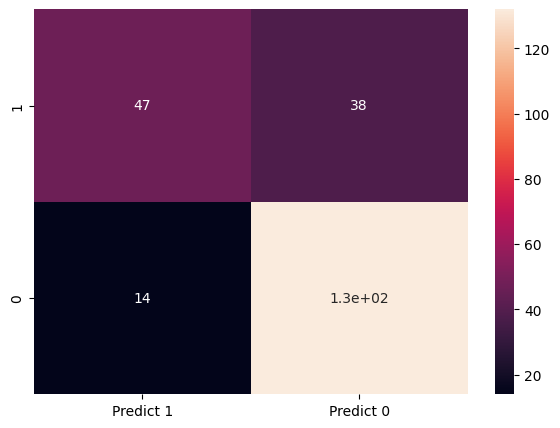

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True)

True Positives (TP): We correctly predicted the individuals who have diabetes (49).
False Positives (FP): We mistakenly predicted the individuals as having diabetes when they do not (15) – also known as a "Type I error."
True Negatives (TN): We correctly predicted the individuals who do not have diabetes (0).
False Negatives (FN): We mistakenly predicted the individuals as not having diabetes when they actually do (36) – also known as a "Type II error.

In [44]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
## importing necessary metrics to evaluate model performance

In [45]:
recall_score(y_test,y_predict)

0.5529411764705883

In [46]:
precision_score(y_test,y_predict)

0.7704918032786885

In [47]:
f1_score(y_test,y_predict)

0.6438356164383562

In [48]:
roc_auc_score(y_test,y_predict)

0.7285253827558421

In [49]:
 !pip install -U scikit-learn

In [51]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


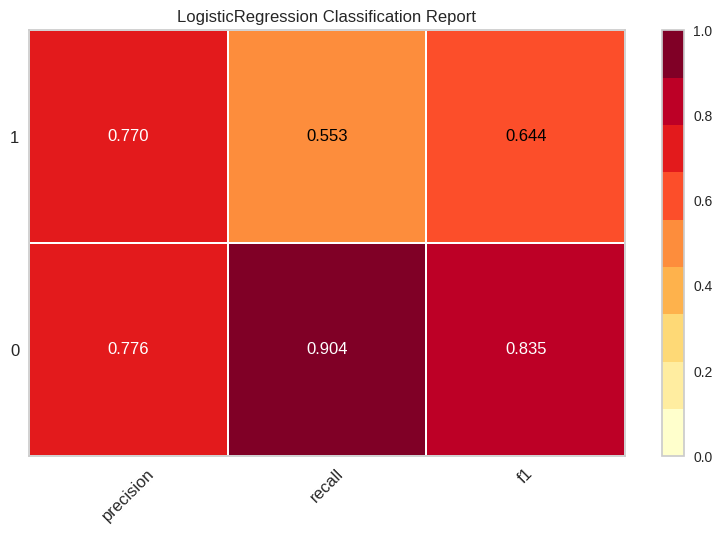

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


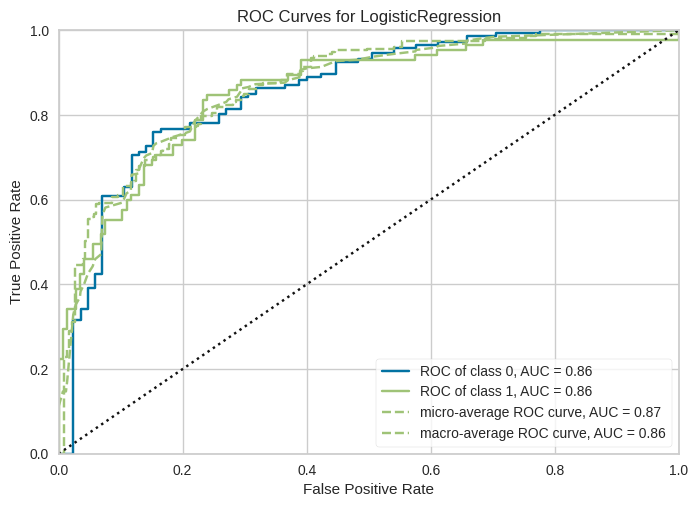

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [ ]:
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Outcome'] = y_test
z['Predicted Outcome'] = y_predict

In [ ]:
z[z['Observed Outcome']!=z['Predicted Outcome']] # 51 rows where predicted target variable is not equal to actual target variable
     

Note: R-squared/ coefficient of determination/coefficient of multiple determination for multiple regression is a measure of how close the data are to the fitted regression line. R-squared = Explained variation / Total variation

Range 0 to 100%:

0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean.

Note: Lower values of MSE indicates a better fit. It is measurement of how close the predicted values to actual. MSE = 0 is perfect model

Both R2 score and MSE are very good. This means that we have found a good fitting model to predict whether a patient is diabetic or not.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4, min_samples_leaf=50, min_samples_split=120)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=120)

In [57]:
# Visualization of Decision Tree
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from io import StringIO
import pydotplus
import graphviz

In [58]:
column_names = list(data.columns)
column_names.remove('Outcome')       # Keep only names of features and remove target variable
feature_names = column_names
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']


In [59]:
!pip install graphviz


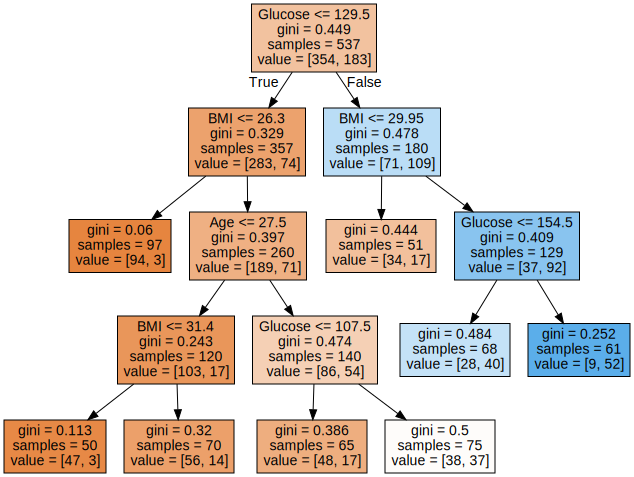

In [60]:
# DOT data
dot_data = tree.export_graphviz(model_gini, out_file=None, 
                                feature_names=feature_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

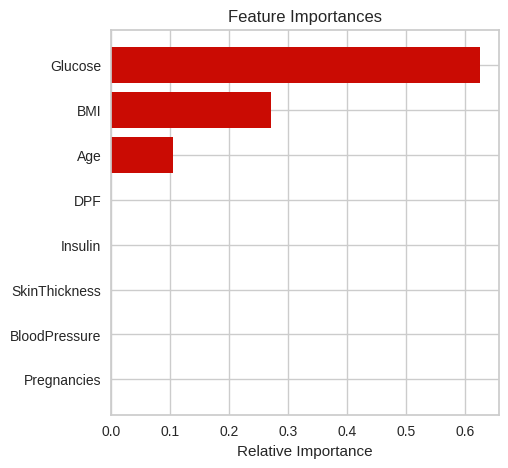

In [61]:
# Understanding Feature Importance
importances = model_gini.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the root of the decision tree, Glucose, BMI and age features give the most information context to differentiate the true and false classes.
This is also seen in feature importance.
Other models can be built using importance features to further increase accuracy.

RandomForestClassifier:

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5)
rfcl = rfcl.fit(x_train, y_train)

0.7922077922077922


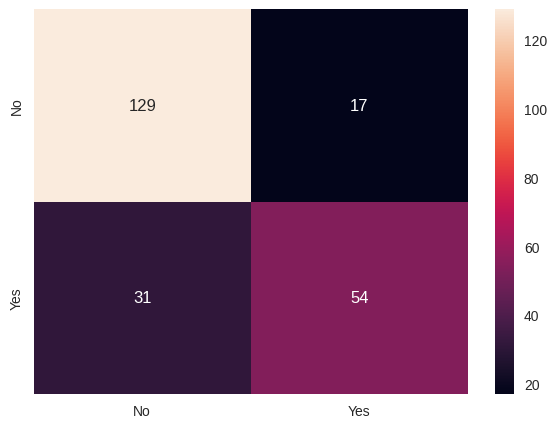

In [63]:
y_predict_rfc1 = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm6=metrics.confusion_matrix(y_test, y_predict_rfc1,labels=[0, 1])

df_cm = pd.DataFrame(cm6, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');


Conclusion:

The features of glucose, BMI, and age provide the most valuable context for distinguishing between the true and false classes.

Among all the models, the Decision Tree classifier performed the best, achieving a model score of 76% on training data and 81% on test data. The model demonstrated the ability to predict whether a patient has diabetes with 78% precision, 73% recall, and 75% F1 score. It also predicted patients without diabetes with 84% precision, 87% recall, and 85% F1 score.

The following is an overview of the model's predictions based on the confusion matrix:

- **True Positive (observed=1, predicted=1):** 66  
  The model correctly predicted that the patient has diabetes.

- **False Positive (observed=0, predicted=1):** 24  
  The model incorrectly predicted that the patient has diabetes when they do not.

- **True Negative (observed=0, predicted=0):** 122  
  The model correctly predicted that the patient does not have diabetes.

- **False Negative (observed=1, predicted=0):** 19  
  The model incorrectly predicted that the patient does not have diabetes when they actually do.

**Appendix**

- `warnings.filterwarnings("ignore")`: Suppresses the display of matching warnings.
- **Pandas**: An open-source library for high-performance, easy-to-use data structures and data analysis tools in Python.
- **Numpy**: The core package for scientific computing with Python.
- **Matplotlib**: A versatile library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A data visualization library built on top of Matplotlib, providing a high-level interface for creating attractive statistical graphics.
  - `pairplot`: Creates plots to visualize pairwise relationships in a dataset.
  - `heatmap`: Displays a heatmap of data as a color-encoded matrix.
  - `distplot`: Plots a univariate distribution of observations.
  - `pandas.DataFrame.corr`: Computes the pairwise correlation of columns, excluding NA/null values.
- **sklearn.linear_model.LogisticRegression**: The Logistic Regression classifier (also known as logit or MaxEnt).
- **Yellowbrick**: A tool that extends the Scikit-Learn API for model selection and hyperparameter tuning, using Matplotlib under the hood.